<div style="text-align:right"><span style="color:black; font-family:Georgia; font-size:1em">Document Created Date:06-02-2020

Image Source:https://cdn-images-1.medium.com/fit/t/1600/480/1*cPAmSB9nziZPI73VC5HAHg.png
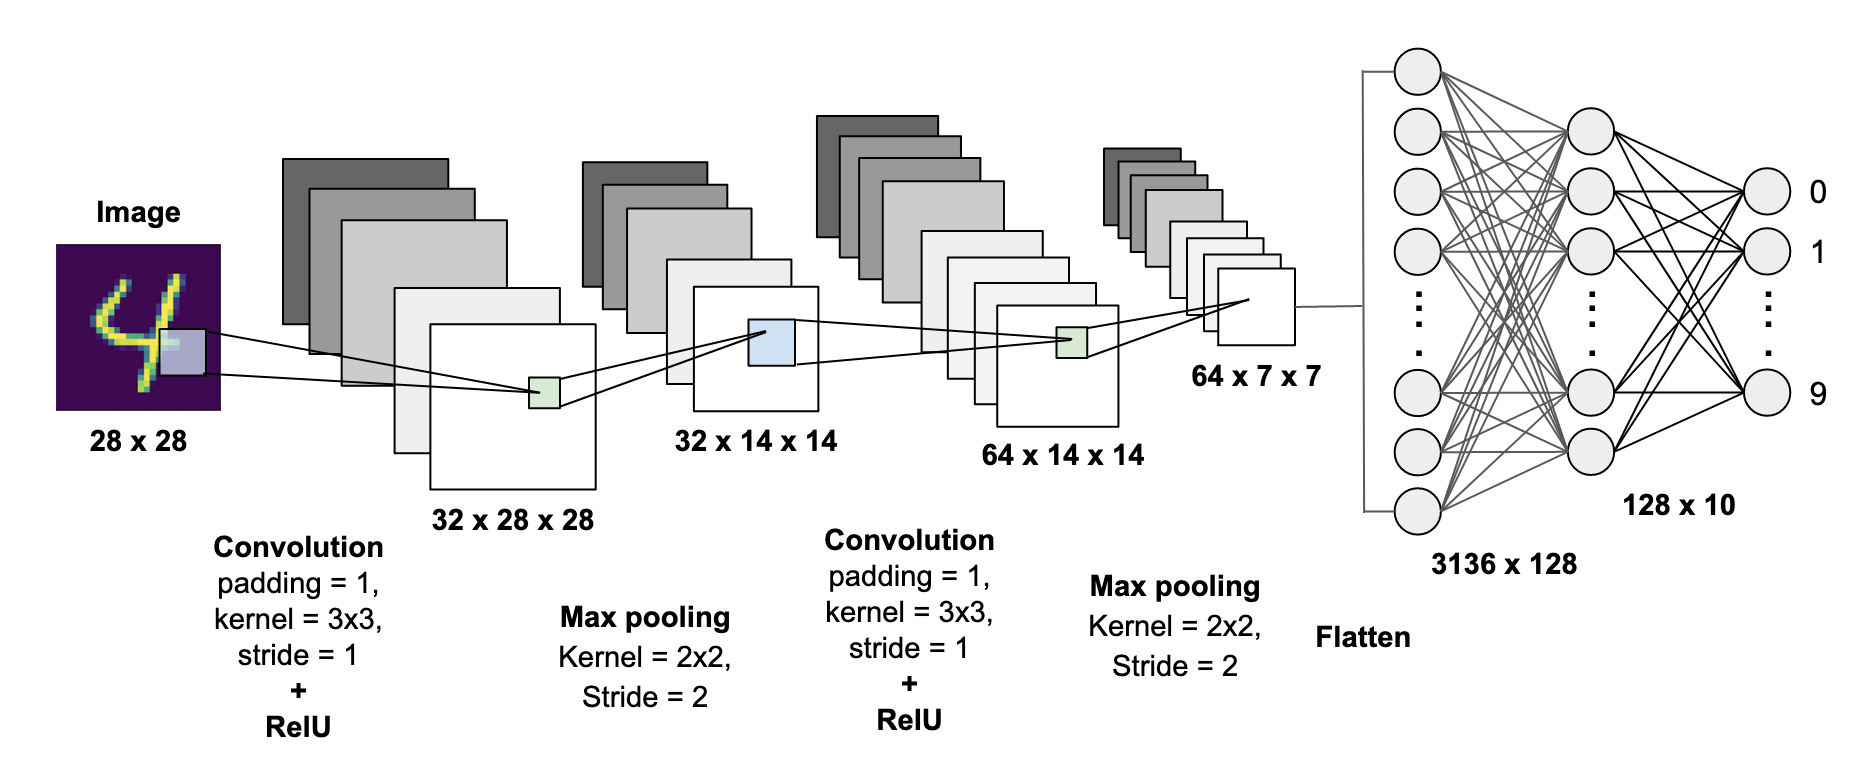

<div style="text-align:left">
<span style="color:green; font-family:Georgia; font-size:1.5em">Understanding the MNIST Dataset</div></span>
<hr>

- The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. 
- The database is also widely used for training and testing in the field of machine learning & deeplearning

- The MNIST database contains 60,000 training images and 10,000 testing images.
- Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

source:https://en.wikipedia.org/wiki/MNIST_database

<div style="text-align:left">
<span style="color:green; font-family:Georgia; font-size:1.5em">Step by Step Procedure</div></span>

- Tried various models with diffrent hidden layer architecture and diffrent Approches (Kernel size,maxpooling, activation, optimizer, regularizer, padding and dropout)
- ploting loss with each epoch of model
- Overall Summary (Conclusion) .
<hr>

<div style="text-align:center"><span style="color:green; font-family:Georgia; font-size:2em;">Applying Various CNN Networks on MNIST Dataset </span><div>

### Model 1 : 2 Layer Architecture + kernel (3, 3) + relu + Adadelta + MaxPooling(2, 2) + Dropout(0.25)

In [7]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import seaborn as sns
from keras import regularizers

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# Model 1 : 2 Layer Architecture + kernel (3, 3) + relu + Adadelta + MaxPooling(2, 2) + Dropout(0.25)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
score_train = model.evaluate(x_train, y_train, verbose=1)
print('train loss', score_train[0])
print('train accuracy:', score_train[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.3017 - acc: 0.9140 - val_loss: 0.0830 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1142 - acc: 0.9714 - val_loss: 0.0547 - val_acc: 0.9865
Epoch 3/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0881 - acc: 0.9772 - val_loss: 0.0530 - val_acc: 0.9862
Epoch 4/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0701 - acc: 0.9824 - val_loss: 0.0543 - val_acc: 0.9853
Epoch 5/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0636 - acc: 0.9833 - val_loss: 0.0378 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0562 - acc: 0.9852 - val_loss: 0.0396 - val_acc: 0.9887
Epoch 

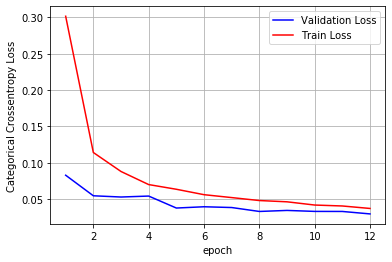

In [9]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# This function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

# ploting loss with epoch of model
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model_2 : 3Layer Architecture + kernel (5, 5) + relu + Adadelta + MaxPooling(2, 2) + Dropout(0.25)

In [10]:
# Model_2 : 3Layer Architecture + kernel (5, 5) + relu + Adadelta + MaxPooling(2, 2) + Dropout(0.25)
%%time
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(5, 5),kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=input_shape))
model_2.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(254, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score_2 = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 324s 5ms/step - loss: 1.6607 - acc: 0.6241 - val_loss: 0.5549 - val_acc: 0.8968
Epoch 2/12
60000/60000 [==============================] - 323s 5ms/step - loss: 0.6823 - acc: 0.8545 - val_loss: 0.4263 - val_acc: 0.9265
Epoch 3/12
60000/60000 [==============================] - 323s 5ms/step - loss: 0.6378 - acc: 0.8780 - val_loss: 0.7211 - val_acc: 0.9124
Epoch 4/12
60000/60000 [==============================] - 323s 5ms/step - loss: 0.6676 - acc: 0.8871 - val_loss: 0.3600 - val_acc: 0.9513
Epoch 5/12
60000/60000 [==============================] - 321s 5ms/step - loss: 0.5693 - acc: 0.8985 - val_loss: 0.4533 - val_acc: 0.9537
Epoch 6/12
60000/60000 [==============================] - 313s 5ms/step - loss: 0.5435 - acc: 0.9043 - val_loss: 0.5548 - val_acc: 0.9184
Epoch 7/12
60000/60000 [==============================] - 313s 5ms/step - loss: 0.5354 - acc: 0.9065 - val_loss: 0.3462 - 

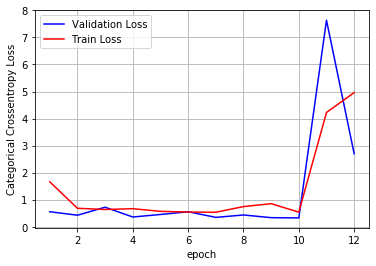

In [11]:
# ploting loss with each epoch of model2
fig, ax=plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) # List of epoch Numbers
vy = history_2.history['val_loss']
ty = history_2.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model_3: 3Layer Architecture + kernel (7, 7) + relu + Adam + MaxPooling(2, 2) + padding(same) + with out Dropout

In [6]:
# Model_3: 3Layer Architecture + kernel (7, 7) + relu + Adam + MaxPooling(2, 2) + padding(same) + with out Dropout
%%time
model_3 = Sequential()
model_3.add(Conv2D(32,kernel_size=(7, 7),padding='same', kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, kernel_size=(7,7),activation='relu'))
model_3.add(Conv2D(128, kernel_size=(7, 7), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Flatten())
model_3.add(Dense(254, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_3= model_3.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score_3 = model_3.evaluate(x_test,y_test, verbose=1)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2709 - acc: 0.9214 - val_loss: 0.0907 - val_acc: 0.9779
Epoch 2/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0828 - acc: 0.9783 - val_loss: 0.0571 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0577 - acc: 0.9852 - val_loss: 0.0429 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0462 - acc: 0.9881 - val_loss: 0.0593 - val_acc: 0.9847
Epoch 5/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0370 - acc: 0.9911 - val_loss: 0.0532 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0339 - acc: 0.9921 - val_loss: 0.0480 - val_acc: 0.9870
Epoch 7/12
60000/60000 [==============================] - 

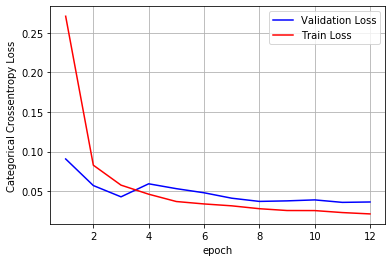

In [7]:
# ploting loss with each epoch of mode3

fig, ax=plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) # List of epoch Numbers
vy = history_3.history['val_loss']
ty = history_3.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model E1(Experiment1) = 3Layer Architecture + kernel (9, 9) + relu + adam + L2 reg + MaxPooling + padding(same) + Dropout(0.3)

In [10]:
# Model E1(Experiment1) = 3Layer Architecture + kernel (9, 9) + relu + adam + L2 reg + MaxPooling + padding(same) + Dropout(0.3
%%time
batch_size_E = 150
num_classes_E = 10
epochs_E = 15
model_E1 = Sequential()
model_E1.add(Conv2D(32,kernel_size=(9, 9),padding='same', kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=input_shape))
model_E1.add(MaxPooling2D(pool_size=(2, 2)))
model_E1.add(Dropout(0.3))
model_E1.add(Conv2D(64, kernel_size=(9,9),padding='same',activation='relu'))
model_E1.add(MaxPooling2D(pool_size=(2, 2)))
model_E1.add(Dropout(0.3))
model_E1.add(Conv2D(128, kernel_size=(9, 9),padding='same', activation='relu'))
model_E1.add(MaxPooling2D(pool_size=(2,2)))
model_E1.add(Flatten())
model_E1.add(Dense(254, activation='relu'))
model_E1.add(Dense(num_classes_E, activation='softmax'))

model_E1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history= model_E1.fit(x_train, y_train, batch_size=batch_size_E,epochs=epochs_E,verbose=1,validation_data=(x_test, y_test))
score_E1 = model_E1.evaluate(x_test,y_test, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 622s 10ms/step - loss: 0.3296 - acc: 0.8995 - val_loss: 0.0811 - val_acc: 0.9788
Epoch 2/15
60000/60000 [==============================] - 622s 10ms/step - loss: 0.0892 - acc: 0.9768 - val_loss: 0.0548 - val_acc: 0.9865
Epoch 3/15
60000/60000 [==============================] - 621s 10ms/step - loss: 0.0676 - acc: 0.9830 - val_loss: 0.0463 - val_acc: 0.9874
Epoch 4/15
60000/60000 [==============================] - 621s 10ms/step - loss: 0.0558 - acc: 0.9855 - val_loss: 0.0541 - val_acc: 0.9873
Epoch 5/15
60000/60000 [==============================] - 619s 10ms/step - loss: 0.0485 - acc: 0.9876 - val_loss: 0.0398 - val_acc: 0.9906
Epoch 6/15
60000/60000 [==============================] - 618s 10ms/step - loss: 0.0447 - acc: 0.9884 - val_loss: 0.0419 - val_acc: 0.9905
Epoch 7/15
60000/60000 [==============================] - 618s 10ms/step - loss: 0.0406 - acc: 0.9900 - val_loss: 0.

In [11]:
print('Test loss:', score_E1[0])
print('Test accuracy:', score_E1[1])

Test loss: 0.04032821790426969
Test accuracy: 0.9906


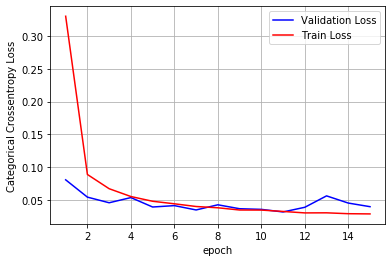

In [12]:
# ploting loss with each epoch of model_E1

fig, ax=plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs_E+1)) # List of epoch Numbers
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model_E2(Experiment2) = Single Layer Architecture + kernel (7, 7) + relu + Adadelta + MaxPooling(2,2) + padding + Dropout(0.3)

In [13]:
# Model E2(Experiment2) = Single Layer Architecture + kernel (7, 7) + relu + Adadelta + MaxPooling(2,2) + padding + Dropout(0.3)
%%time
from keras.layers import Activation
model_E2 = Sequential()
model_E2.add(Conv2D(64,kernel_size=(7, 7), activation='relu',input_shape=input_shape))
model_E2.add(MaxPooling2D(pool_size=(2, 2)))
model_E2.add(Dropout(0.3))
model_E2.add(Flatten())
model_E2.add(Dense(254, activation='relu'))
model_E2.add(Dense(num_classes_E, activation='softmax'))

model_E2.compile(optimizer=keras.optimizers.Adadelta(), loss='categorical_crossentropy',metrics=['accuracy'])
history= model_E2.fit(x_train, y_train, batch_size=batch_size_E,epochs=epochs_E,verbose=1,validation_data=(x_test, y_test))
score_E2 = model_3_conv_5L.evaluate(x_test,y_test, verbose=1)
print('Test loss:', score_E2[0])
print('Test accuracy:', score_E2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1991 - acc: 0.9400 - val_loss: 0.0772 - val_acc: 0.9749
Epoch 2/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0584 - acc: 0.9824 - val_loss: 0.0518 - val_acc: 0.9832
Epoch 3/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0426 - acc: 0.9864 - val_loss: 0.0321 - val_acc: 0.9892
Epoch 4/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0332 - acc: 0.9896 - val_loss: 0.0318 - val_acc: 0.9895
Epoch 5/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0307 - val_acc: 0.9898
Epoch 6/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0286 - val_acc: 0.9902
Epoch 7/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0187 - acc: 0.9945 - val_loss: 0.0281 - val_acc

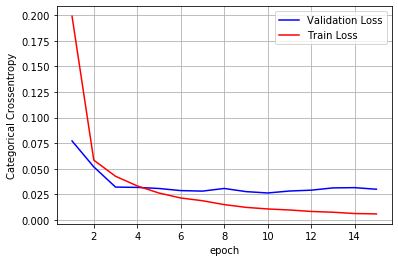

In [15]:
# ploting loss with each epoch of model_E2
fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy')
x = list(range(1,epochs_E+1)) # List of epoch Numbers
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model_E3(Experiment3) = 4Layer Architecture + kernel (11, 11) + relu + L2 Reg + Adam + MaxPooling(2, 2) + padding + Dropout(0.5)

In [13]:
# Model E3(Experiment3) = 4Layer Architecture + kernel (11, 11) + relu + L2 Reg + Adam + MaxPooling(2, 2) + padding + Dropout(0.5)
%%time
model_E3 = Sequential()
model_E3.add(Conv2D(16,kernel_size=(11, 11),padding='same', kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=input_shape))
model_E3.add(MaxPooling2D(pool_size=(2, 2)))
model_E3.add(Dropout(0.5))
model_E3.add(Conv2D(32, kernel_size=(11, 11), padding='same', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_E3.add(Conv2D(64, kernel_size=(11,11),padding='same',activation='relu'))
model_E3.add(MaxPooling2D(pool_size=(2, 2)))
model_E3.add(Dropout(0.5))
model_E3.add(Conv2D(128, kernel_size=(11, 11),padding='same', activation='relu'))
model_E3.add(MaxPooling2D(pool_size=(2,2)))
model_E3.add(Dropout(0.5))
model_E3.add(Flatten())
model_E3.add(Dense(254,activation='relu'))
model_E3.add(Dense(num_classes, activation='softmax'))

model_E3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history= model_E3.fit(x_train, y_train, batch_size=batch_size_E,epochs=epochs_E,verbose=1,validation_data=(x_test, y_test))
score_E3 = model_E3.evaluate(x_test,y_test, verbose=1)

print('test loss :', score_E3[0])
print('test accuracy :', score_E3[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1282s 21ms/step - loss: 0.5560 - acc: 0.8143 - val_loss: 0.0947 - val_acc: 0.9786
Epoch 2/15
60000/60000 [==============================] - 1291s 22ms/step - loss: 0.1416 - acc: 0.9643 - val_loss: 0.0701 - val_acc: 0.9847
Epoch 3/15
60000/60000 [==============================] - 1300s 22ms/step - loss: 0.1093 - acc: 0.9742 - val_loss: 0.0609 - val_acc: 0.9879
Epoch 4/15
60000/60000 [==============================] - 1285s 21ms/step - loss: 0.1006 - acc: 0.9770 - val_loss: 0.0563 - val_acc: 0.9899
Epoch 5/15
60000/60000 [==============================] - 1285s 21ms/step - loss: 0.0924 - acc: 0.9797 - val_loss: 0.0603 - val_acc: 0.9888
Epoch 6/15
60000/60000 [==============================] - 1303s 22ms/step - loss: 0.0878 - acc: 0.9818 - val_loss: 0.0512 - val_acc: 0.9923
Epoch 7/15
60000/60000 [==============================] - 1268s 21ms/step - loss: 0.0852 - acc: 0.9817 - val_l

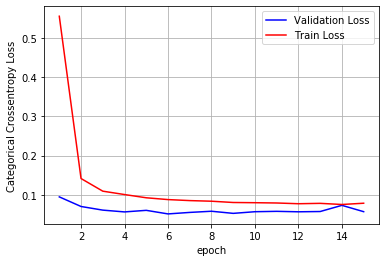

In [17]:
# ploting loss with epoch of model_E3
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs_E+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

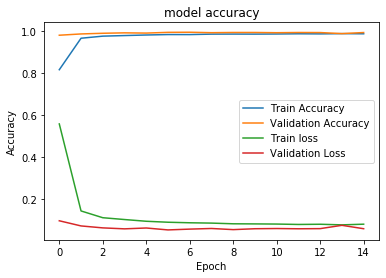

In [19]:
# ploting Train Accuracy , validation Accuracy , train loss , validation loss 
import matplotlib.pyplot as plt
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Validation Accuracy","Train loss","Validation Loss"])
plt.show()

### Model_4(Experiment4) : 2Layer Architecture + Kernel(3, 3) with relu followed by maxpooling (2, 2), padding, L2 reg, Adam, and with out Dropout 

In [6]:
# Model_4(Experiment4) : 2Layer Architecture + Kernel(3, 3) with relu followed by maxpooling (2, 2), padding, L2 reg, Adam, and with out Dropout
%%time
model_E4 = Sequential()
model_E4.add(Conv2D(64,kernel_size=(3, 3),padding='same', kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=input_shape))
model_E4.add(MaxPooling2D(pool_size=(2, 2)))
model_E4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_E4.add(MaxPooling2D(pool_size=(2, 2)))
model_E4.add(Flatten())
model_E4.add(Dense(254,activation='relu'))
model_E4.add(Dense(num_classes, activation='softmax'))

model_E4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_E4 = model_E4.fit(x_train, y_train, verbose=1, batch_size=batch_size_E, epochs=epochs_E, validation_data=(x_test, y_test))
score_E4 = model_E4.evaluate(x_test, y_test, verbose=1,)
print('Test Loss:', score_E4[0])
print('Test Accuracy:', score_E4[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1665 - acc: 0.9510 - val_loss: 0.0467 - val_acc: 0.9866
Epoch 2/15
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0487 - acc: 0.9855 - val_loss: 0.0348 - val_acc: 0.9901
Epoch 3/15
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0334 - acc: 0.9899 - val_loss: 0.0329 - val_acc: 0.9899
Epoch 4/15
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0240 - acc: 0.9935 - val_loss: 0.0332 - val_acc: 0.9902
Epoch 5/15
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0191 - acc: 0.9953 - val_loss: 0.0309 - val_acc: 0.9911
Epoch 6/15
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0155 - acc: 0.9959 - val_loss: 0.0279 - val_acc: 0.9914
Epoch 7/15
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0129 - acc: 0.9968 - val_loss: 0.0323 - 

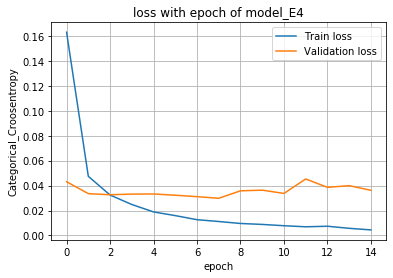

In [5]:
# ploting loss with epoch of model_E4
import matplotlib.pyplot as plt
plt.plot(history_E4.history['loss'])
plt.plot(history_E4.history['val_loss'])
plt.grid()
plt.title('loss with epoch of model_E4')
plt.xlabel('epoch')
plt.ylabel('Categorical_Croosentropy')
plt.legend(['Train loss', 'Validation loss'])
plt.show()

In [12]:
from prettytable import PrettyTable
p = PrettyTable()

p.field_names = ['Model', 'Architec',"batch",'epochs','kernel','MaxPool','Activation', "Optimizer",'Regulrize',
                 'Dropout','Val_loss', 'Val_Acc' ]
p.add_row(["Model_1","2 Layer", 128, 12, "3, 3", "2, 2",  "relu", "Adadelta", "L2 (0.01)",  0.25, 0.029,  0.9916 ])
p.add_row(["Model_2","3 Layer", 128, 12, "5, 5", "2, 2",  "relu", "Adadelta", "L2 (0.01)",  0.25, 2.698,  0.9390 ])
p.add_row(["Model_3","3 Layer", 128, 12, "7, 7", "2, 2",  "relu", "Adam",     "L2 (0.01)",  "--", 0.0364, 0.9925 ])

p.add_row(["Model_E1","3 Layer",150, 15, "9, 9", "2, 2",  "relu", "Adam",     "L2 (0.01)",  0.3,  0.0403, 0.9906 ])
p.add_row(["Model_E2","1 Layer",150, 15, "7, 7", "2, 2",  "relu", "Adadelta", "--",         0.3,  0.0300, 0.9913 ])
p.add_row(["Model_E3","4 Layer",150, 15, "11, 11","2, 2", "relu", "Adam",     "L2 (0.001)", 0.5,  0.0569, 0.9914 ])
p.add_row(["Model_E4","2 Layer",150, 15, "3, 3",  "2, 2", "relu", "Adam",     "L2 (0.001)", "--", 0.0356, 0.9909 ])


print(p)

+----------+----------+-------+--------+--------+---------+------------+-----------+------------+---------+----------+---------+
|  Model   | Architec | batch | epochs | kernel | MaxPool | Activation | Optimizer | Regulrize  | Dropout | Val_loss | Val_Acc |
+----------+----------+-------+--------+--------+---------+------------+-----------+------------+---------+----------+---------+
| Model_1  | 2 Layer  |  128  |   12   |  3, 3  |   2, 2  |    relu    |  Adadelta | L2 (0.01)  |   0.25  |  0.029   |  0.9916 |
| Model_2  | 3 Layer  |  128  |   12   |  5, 5  |   2, 2  |    relu    |  Adadelta | L2 (0.01)  |   0.25  |  2.698   |  0.939  |
| Model_3  | 3 Layer  |  128  |   12   |  7, 7  |   2, 2  |    relu    |    Adam   | L2 (0.01)  |    --   |  0.0364  |  0.9925 |
| Model_E1 | 3 Layer  |  150  |   15   |  9, 9  |   2, 2  |    relu    |    Adam   | L2 (0.01)  |   0.3   |  0.0403  |  0.9906 |
| Model_E2 | 1 Layer  |  150  |   15   |  7, 7  |   2, 2  |    relu    |  Adadelta |     --     |

# Conclusion : Overall Summary with Experiment

*  **Tried various models with diffrent hidden layer architecture and diffrent Approches (Kernel size,maxpooling,
   activation, optimizer, regularizer, padding and dropout)**
*  **L2 Regularization was helps to the model performence and it avoid's the model overfit.**
*  **All models took larger amount of computional power(worked with CPU).**
*  **For better model performence, the hidden layer size , batchsize, and epochs should be choose reasonably and it              shouldn't be too hegh numbers and it shouldn't be low numbers based on the dataset size we have .**
*  **By experimenting with all diffrent apprroches to the model, loss and accutracy changes within reasonable limits.**
*  **CNN models works very well with large amount of layers and large kernel sizes also.**
*  **Overall CNN models works very well with heigh accuracy and low eroor loss on MNIST Dataset.**


<div style="text-align:center"><span style="color:green;fontfamily:Georgia; font-size:2em;">Thank You.</div></span>

<nav style="text-align:center">
<a href="https://www.linkedin.com/in/rameshbattuai/">**Sign Off RAMESH BATTU**</a></nav>